# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Привет) ну погнали

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Добавили библиотеки, прочитали файл и указали что таблицы разделены \t, что бы файл был более читаемый

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Вывели первые 10 строчек, на первый взгляд увидели большое колличество пропусков NaN в разных столбах. С каждой причиной будем разбираться дальше, когда поймем причины пропусков.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итоговое колличество записей должно быть 23 699. 
Вывели колличество отсутствующих значений в каждом из столбце, дальше будем разбираться почему так произошло

In [6]:
data.duplicated().sum()

0

Из хорошего, нет дубликатов

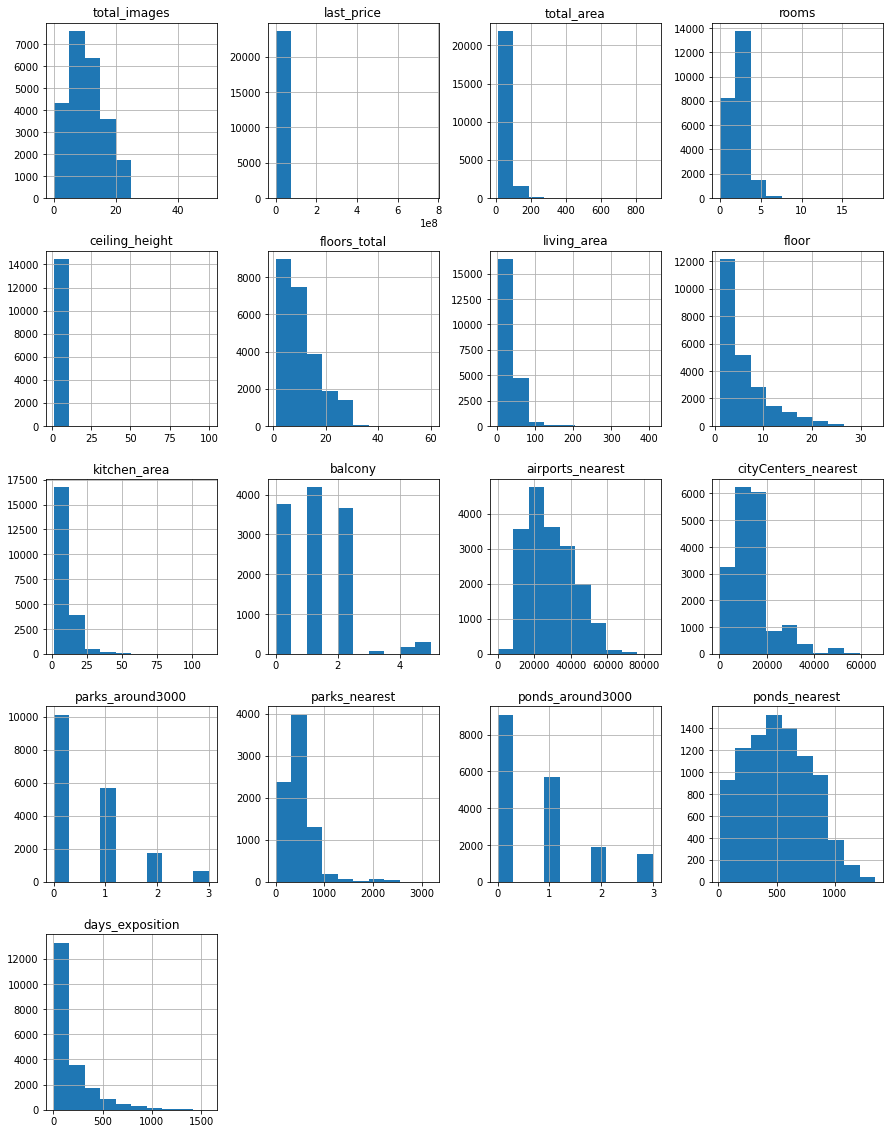

In [7]:
data.hist(figsize=(15, 20));

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Теперь прикинем, что к чему:

total_images — число фотографий квартиры в объявлении - диапозон от 0 до 50 фотографий. Пока выглядит логично так как среднее значение 10, что позволяет весьма наглядно ознакомиться с помещением.

last_price - цена на момент снятия с публикации - в среднем цена 6,5кк, но исходя из медианы половина дешевле 4,65кк.Тип данных лучше заменить на int (копейки не играют роли);

total_area - общая площадь квартиры в квадратных метрах (м²) - средняя площая 60 м², медиана 52 м², и очевидный выброс с 900 м²

rooms — число комнат - в среднем продавали двушки, максимально 19 комнат, так же есть "0" комнат - скорее всего это "студии", надеюсь их не надо будет преобразовывать;

ceiling_height — высота потолков (м) - есть пропущенные данные, есть выбросы со значениями 1 и 100(мб запятую пропустили), но в целом высота потолка у всех близка к стандарту;

floors_total — всего этажей в доме - нужно перевести в int, так как число этажей не может быть дробным. Также есть пропуски; 

living_area — жилая площадь в квадратных метрах (м²) - есть пропуски(странно продавать квартиры без указания площади), есть выбросы (минимум 2 метра и максимум 409);

floor — этаж - Первично, всё корректно, пропусков нет;

kitchen_area — площадь кухни в квадратных метрах (м²) - есть пропуски и выбросы;

balcony — число балконов - заменить тип данных на int, есть пропуски(вот тут либо пропуски = нет,либо просто не внесли данные);

airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - много пропусков,есть выбросы( 0 метров, квартира прям в аэропорту, уважаемо);

cityCenters_nearest — расстояние до центра города (м) - первично, есть пропуски, но надо переименовать под Snake case;

parks_around3000 — число парков в радиусе 3 км - есть пропуски, тип данных заменить на int;

parks_nearest — расстояние до ближайшего парка (м) - есть пропуски, тип данных лучше заменить на int;

ponds_around3000 — число водоёмов в радиусе 3 км - есть пропуски, тип данных заменить на int;

ponds_nearest — расстояние до ближайшего водоёма (м) - есть пропуски, тип данных лучше заменить на int (см не играют роли);

days_exposition — сколько дней было размещено объявление (от публикации до снятия) - есть пропуски, тип данных заменить на int.

Оставшиеся столбы первично оценим по пропускам и типу переменной

is_apartment — апартаменты (булев тип) - много пропусков и нужно поменять тип переменной;

studio — квартира-студия (булев тип) - Первично, всё корректно, пропусков нет;

open_plan — свободная планировка (булев тип) - Первично, всё корректно, пропусков нет;

locality_name — название населённого пункта - есть пропуски;

Вроде ничего не пропустил

### Предобработка данных

Найдите и изучите пропущенные значения в столбцах:

    Определите, в каких столбцах есть пропуски.
Заполните пропущенные значения там, где это возможно. 
Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. 
Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. 
Пропущенные значения — тоже важный сигнал, который нужно учитывать.
В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

    Рассмотрите типы данных в каждом столбце:

Найдите столбцы, в которых нужно изменить тип данных.
Преобразуйте тип данных в выбранных столбцах.
В ячейке с типом markdown поясните, почему нужно изменить тип данных.
    
    Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

Проведем работу с неявными дубликатами в названиях

In [9]:
len(data['locality_name'].unique())

365

In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [12]:
len(data['locality_name'].unique())

331

Было 365 стало 331 и это хорошо

In [13]:
data['locality_name'].isna().sum()

49

In [14]:
data = data.dropna(subset=['locality_name'])

удалим строки без городов

In [15]:
data['locality_name'].isna().sum()

0

Пропусков нет

Проведем анализ типов жил площади

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Получили массив из nan, False и True. Надо что-то сделать с nan. Предположим, что отсутсвие значения равно тому, что это не аппартаменты

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(0).map({True: 1, False: 0})

In [18]:
data['is_apartment'].unique()

array([0, 1])

In [19]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Поменяли тип аппартаментов на 0 и 1, вдруг считать придётся, так удобней

Проделаю тоже самое со студиями

In [20]:
data['studio'].unique()

array([False,  True])

In [21]:
data['studio'].value_counts()

False    23501
True       149
Name: studio, dtype: int64

In [22]:
data['studio'] = data['studio'].map({True: 1, False: 0})

In [23]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,0,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,0,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,0,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,0,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,0,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проделаю тоже самое с квартирами свободной планировки

In [24]:
data['open_plan'].unique()

array([False,  True])

In [25]:
data['studio'].value_counts()

0    23501
1      149
Name: studio, dtype: int64

In [26]:
data['open_plan'] = data['open_plan'].map({True: 1, False: 0})
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,0,0,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,0,0,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,0,0,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,0,0,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,0,0,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь понятней смотреть на таблицу

Проведем работу с балконами, не нравится Nan - это скорее всего их просто нет, надо заменить и перевести в целые значения

In [27]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

In [28]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,0,0,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


А давайте сразу, сделаем это всё с оставшимися Nan

In [29]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,0,0,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


с простыми Nan разобрались, остались числа. В зависимости от типа логики будем брать или среднее или медианы

Разберемся с высотой потолков, много Nan + есть выбросы

In [30]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Теперь проверим супер низкие квартиры

In [31]:
data.query('ceiling_height < 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,0,0,0,6.50,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,0,0,0,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,0,0,0,8.80,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,0,0,0,5.20,0,городской поселок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,0,0,0,NaN,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,0,0,0,10.10,0,поселок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,0,0,0,12.00,0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,0,0,0,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,0,0,0,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,0,0,0,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0


Удалим такие квартиры

In [32]:
data.drop(data[data.ceiling_height < 2.1].index, inplace=True)

Теперь проверим супер высокие квартиры

In [33]:
data.query('ceiling_height >6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,0,0,0,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,0,0,0,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,0,0,0,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,0,0,0,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,0,0,1,NaN,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,1,0,0,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,0,0,0,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,0,0,0,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,0,0,0,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,0,0,0,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Разделим все подходящие значения на 10, видимо при заполнении данных ошиблись запятой

In [34]:
data.loc[(data.ceiling_height >= 22.6) & (data.ceiling_height <= 32), 'ceiling_height'] /= 10
data.drop(data[data.ceiling_height > 6].index, inplace=True)

Проверим, что получилось

In [35]:
data['ceiling_height'].isnull().sum()

0

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,0,0,0,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,0,0,0,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Дальше идёт жилая площадь, для упрощения возьмем медиану. Да и вообще, кто продаёт квариртиру без указания площади но мб проблема была в переносе данных, но работаем с чем есть

In [37]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) #сделам сразу с кухней так же

Спасибо. В данном случае думал не брать среднее значение, но жизненный опыт, что кухни +- у всех идентичны по площади и желание уменьшить колличество пропусков победило

In [38]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,0,0,0,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,0,0,0,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,0,0,0,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.00,9,0,0,0,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,0,0,0,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,0,0,0,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,0,0,0,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.00,22,0,0,0,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,0,0,0,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,0,0,0,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [39]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15571
ponds_around3000         5500
ponds_nearest           14550
days_exposition          3176
dtype: int64

Выведем сумму, посмотрим что получилось:
Я считаю что, в таких данных как airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,last_price,first_day_exposition нет возможности избавиться от пропусков. Нельзя привести к среднему/медиане, заменить на 0 или удалить, это значительно повлияет на итоговую аналитику.
в колонке floors_total  - 85 пропусков(можем удалить)
Хотелось бы увидеть ваши комментарии

In [40]:
data = data.dropna(subset=['floors_total'])
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Преобразуем типы в соответствии с комментариями выше

In [41]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['last_price'] = data['last_price'].astype(int)

In [42]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5514
city_centers_nearest     5491
parks_around3000         5490
parks_nearest           15520
ponds_around3000         5490
ponds_nearest           14514
days_exposition          3167
dtype: int64

In [43]:
data = data[data['total_area'] <= 200]
data = data[data['floors_total'] < 17]

Дополнительно были выделенны 2 группы с аномальными значениями - это квартиры с жил площадью выше 200 кв.м. и этажностью дома выше 17. Было принято решение удалить эти строки из начального датафрейма

Проведя Предобработка данных мы можем выделить аномалии в следующих столбцах:'total_area', 'days_exposition', 'floors_total'. Уберем выявленные аномалии, что бы в дальнейшем данные были более корректны:


По проделанной работе можно сделать следующие выводы:
- Данные были не полные, часть не заполнили продавцы кваритр, часть могла потеряться при переносе данных
- Повел работу с пропусками, часть значений(не критичную для дальнейшего анализа) удалили, часть изменили на 0, для части взяли медиану
- Скорректировали типы переменных для удоства работы с ними
- Удалили аномальные значения

Вижу возможные ошибки в проделанной работе:
- так как не знал, что сделать с некоторыми пропусками (по типу колонок city_centers_nearest и days_exposition) взял их медиану, наверно стоило оставить как есть или изменить на другое значение, но будем надеяться, что это не сильно изменит итоги анализа
- так как не знал, что сделать с некоторыми пропусками ( по типу колонок airports_nearest, parks_around3000 и т.д.) присвоил им значение 0, опять же, возможно их надо было оставить
- не структурированное повествование, но будет что исправить в следующей итерации

### Посчитайте и добавьте в таблицу новые столбцы

Добавьте в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

Цена одного квадратного метра 

In [44]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']
data['price_one_square_meter'] = data['price_one_square_meter'].round(2)

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [45]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

Месяц публикации объявления;

In [46]:
data['exposition_month'] = data['first_day_exposition'].dt.month

Год публикации объявления;

In [47]:
data['exposition_year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «первый», «последний», «другой»);

In [48]:
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [49]:
data['floor_category'] = data.apply(get_floor_category, axis=1)

Расстояние до центра города в километрах 

In [50]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [51]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,0,0,0,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,0,0,0,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,0,0,0,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,0,0,0,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,0,0,0,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

In [52]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,city_centers_nearest_km
count,18712.000000,1.871200e+04,18712.000000,18712.000000,18712.000000,18712.000000,18712.000000,18712.000000,18712.000000,18712.000000,18712.000000,18712.000000,18712.000000,14148.000000,14158.000000,14159.000000,6878.000000,14159.000000,7176.00000,16041.000000,1.871200e+04,18712.000000,18712.000000,18712.000000,14158.000000
mean,9.884352,6.017737e+06,58.844006,2.127565,2.693546,8.017582,34.114172,4.529820,0.002351,0.003474,0.001603,9.878547,0.544036,28427.453492,14200.316994,0.673000,484.809392,0.796101,517.96767,182.587058,9.605629e+04,2.556114,6.389910,2017.372649,14.196567
std,5.578959,6.727769e+06,26.893748,1.001215,0.229431,3.782042,17.053992,3.160108,0.048436,0.058837,0.040010,5.232072,0.921588,12359.889096,9393.999405,0.822758,343.710868,0.959423,274.29414,220.445546,4.875426e+04,1.787388,3.485674,1.048412,9.402274
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.00000,1.000000,7.962960e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,41.100000,1.000000,2.560000,5.000000,20.100000,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,18690.500000,8370.000000,0.000000,285.250000,0.000000,296.00000,45.000000,7.292308e+04,1.000000,3.000000,2017.000000,8.000000
50%,10.000000,4.500000e+06,52.100000,2.000000,2.650000,8.000000,30.000000,4.000000,0.000000,0.000000,0.000000,9.000000,0.000000,26104.500000,12658.000000,0.000000,449.000000,1.000000,504.00000,97.000000,9.207029e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.571250e+06,69.000000,3.000000,2.700000,10.000000,42.000000,6.000000,0.000000,0.000000,0.000000,10.900000,1.000000,36641.500000,16153.000000,1.000000,602.000000,1.000000,726.00000,233.000000,1.106406e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,200.000000,11.000000,6.000000,16.000000,164.700000,16.000000,1.000000,1.000000,1.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.00000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


Пойдем по списку и начнём с площади квартиры

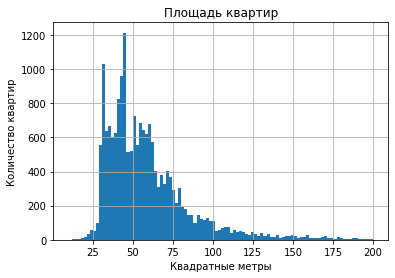

In [53]:
data['total_area'].hist( bins=100, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Оснвное колличество квартир находится между +-30 кв.м. и 70 кв.м. Как мы видим всплески происходят на 30 кв.м. и порядка 45м. Предположить таких всплесков можно с типовой застройкой квартир и эта площадь составляет 1 и 2х комнатные квартиры. Так же можем сделат вывод, что для анализа мы могли "обрезать" даннные свыше 125 кв.м.

Проведем анализ жилой площади

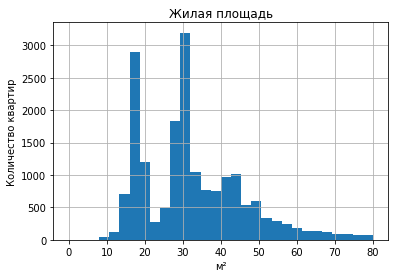

In [54]:
data['living_area'].hist( bins=30, range=(0,80))
plt.title('Жилая площадь')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Исключил выбросы, так как они крайне редки. Видим всплески на 19м2 и 30м2, которые можно описать большим колличеством студий и однокомнатных кваритр.
В целом, распределение логично так как квартир с большой площадью значительно меньше чем типовых застроек (студии,1-2-3х комнатные квартиры)

Проведем анализ площади кухни

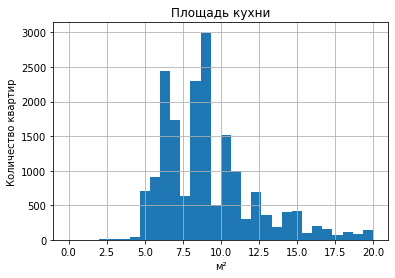

In [55]:
data['kitchen_area'].hist( bins=30, range=(0,20))
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Исключил выбросы, так как они крайне редки. Видим всплески на 6 м2 и 9м2, классическая площадь для кухонь. Как обычно есть хвост связанный с тем, что такой же хвост есть и в графике "площадь квартир" и их можно логично связать между собой

Проведем анализ итоговой цены объекта

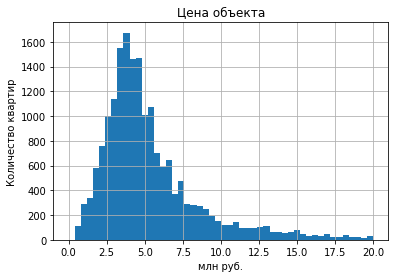

In [56]:
(data['last_price']/1000000).hist(bins=50,range=(0,20))
plt.title('Цена объекта')
plt.xlabel('млн руб.')
plt.ylabel('Количество квартир')
plt.show()

Как мы видим, основное колличество квартир продалось в диапазоне 3-6 миллионов с пиком в районе 4х миллионов рублей. 
Значительно меньше квартир стоимость от 10ти милионов рублей, это хорошо соотносится с графиками площади квартир. 
Пока всё логично

Проведем анализ колличества комнат

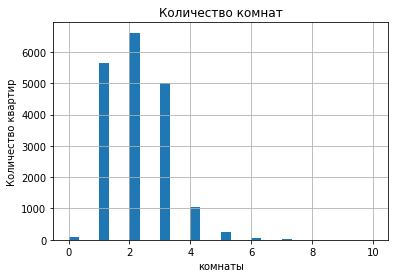

In [57]:
data['rooms'].hist( bins=30, range=(0,10))
plt.title('Количество комнат')
plt.xlabel('комнаты')
plt.ylabel('Количество квартир')
plt.show()

Видим классическое распределение, основная доля 1,2,3-х комнатных квартир и реже встречаются 4х комнатные и более

Проведем анализ высоты потолков

[2.2  2.25 2.26 2.3  2.34 2.4  2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52
 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66
 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8
 2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94
 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06 3.07 3.08
 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.2  3.21 3.22 3.23
 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32 3.33 3.34 3.35 3.36 3.37
 3.38 3.39 3.4  3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49 3.5  3.51 3.52
 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.62 3.63 3.65 3.66 3.67 3.68
 3.7  3.75 3.78 3.8  3.83 3.84 3.85 3.88 3.9  3.93 3.95 3.98 4.   4.06
 4.1  4.14 4.15 4.19 4.2  4.25 4.3  4.37 4.4  4.5  4.8  5.   5.3  5.5
 5.8  6.  ]


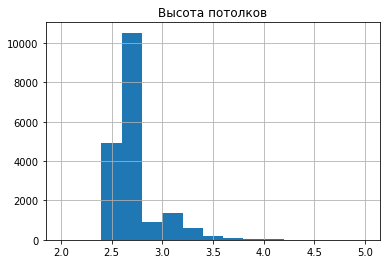

In [58]:
data['ceiling_height']=data['ceiling_height'].apply(lambda x: x/10 if x>20 else x)
print(data['ceiling_height'].sort_values().unique())
data['ceiling_height'].hist(bins=15, range=(2,5))
plt.title('Высота потолков')
plt.show()

Основная высоту потолков от 2,5 до 2,75 метров. Высота потоклов более 3 метров встречается крайне редко.
Есть крайне редкое колличества потолков выше 3х метро, что имеет место быть

Проведем анализ этажей квартир

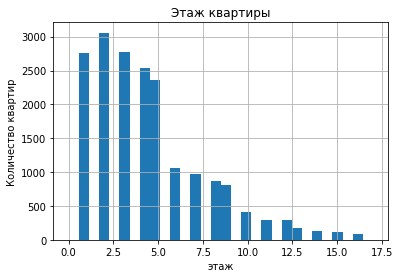

In [59]:
data['floor'].hist( bins=30, range=(0,17))
plt.title('Этаж квартиры')
plt.xlabel('этаж')
plt.ylabel('Количество квартир')
plt.show()

Анализ показывает, что основное колличество квартир располагаются до 12-го этажа. Пик прихоидтся на 5ти этажки

Проведем анализ типа этажа квартиры

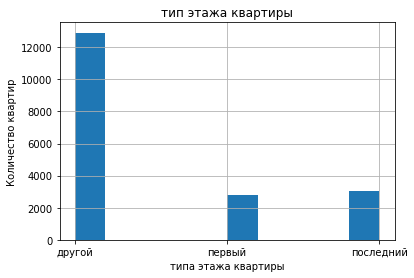

In [60]:
data['floor_category'].hist()
plt.title('тип этажа квартиры')
plt.xlabel('типа этажа квартиры')
plt.ylabel('Количество квартир')
plt.show()

В целом, распределение квартир логично, основное колличество квартир располагаются не на первом и последнем этажах

Проведем анализ общего количества этажей в доме

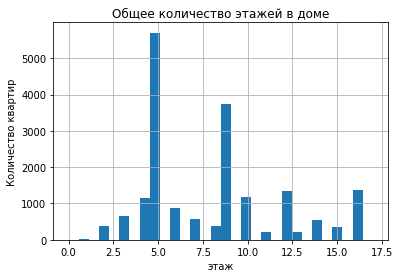

In [61]:
data['floors_total'].hist( bins=30, range=(0,17))
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('Количество квартир')
plt.show()

Основное колличество квартир 5-ти этажки, и дополнительные всплески в районе 9-ти и 16-ти этажек. 
Квартиры выше 17 го встречаются реже, поэтому мы и удалили эти квартиры из датафрейма

Проведем анализ расстояния до центра города в метрах;

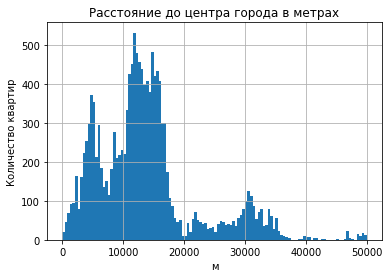

In [62]:
data['city_centers_nearest'].hist( bins=120, range=(0,50000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Большинство объектов недвижимости расположены на удалении 13-ти 14-ти  км от центра. 
Так же есть скачёк в районе 5-6 км
Остальные варианты представлены реже.

Проведем анализ расстояния до ближайшего аэропорта;

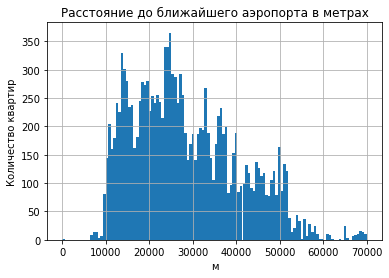

In [63]:
data['airports_nearest'].hist( bins=120, range=(0,70000))
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км. В "затухающей" зоне есть так же всплеск на расстоянии 52км

Проведем анализ расстояния до ближайшего парка;

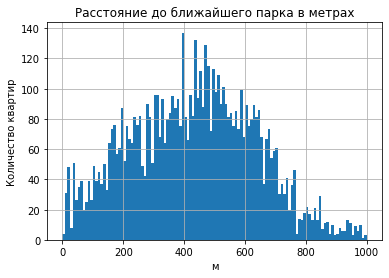

In [64]:
data['parks_nearest'].hist( bins=120, range=(0,1000))
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м.

Проведем анализ дня публикации объявления

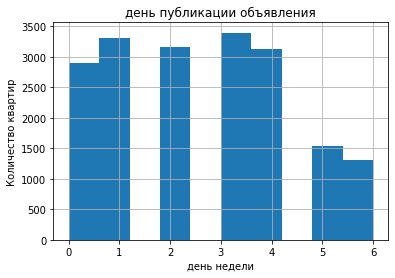

In [65]:
data['exposition_weekday'].hist()
plt.title('день публикации объявления')
plt.xlabel('день недели')
plt.ylabel('Количество квартир')
plt.show()

Основное колличество размещений объявлений приходятся на рабочие дни

Проведем анализ месяца публикации объявления

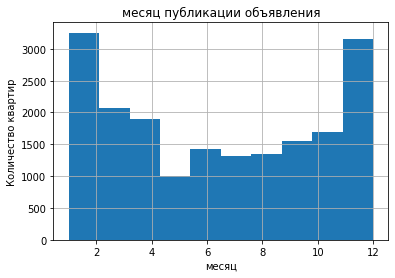

In [66]:
data['exposition_month'].hist()
plt.title('месяц публикации объявления')
plt.xlabel('месяц')
plt.ylabel('Количество квартир')
plt.show()

Видим пики по публикациям в конце и начале года. Новый год новая жизнь

- C учётом ваших комментариев, аномальные выбросы выделил в 2х группа total_area,days_exposition. Скорректировал данные в изначальном дата фрейме
- Скорректировал выводы в гистограммах
- Скорректировал выводы в анализах ниже

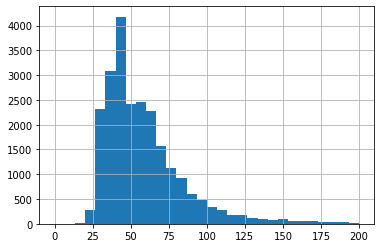

In [67]:
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30, range=(0,200));

In [68]:
data.isnull().sum().sort_values()/data.shape[0]*100

total_images                0.000000
exposition_year             0.000000
exposition_month            0.000000
exposition_weekday          0.000000
price_one_square_meter      0.000000
locality_name               0.000000
floor_category              0.000000
kitchen_area                0.000000
open_plan                   0.000000
studio                      0.000000
balcony                     0.000000
floor                       0.000000
living_area                 0.000000
floors_total                0.000000
ceiling_height              0.000000
last_price                  0.000000
total_area                  0.000000
first_day_exposition        0.000000
rooms                       0.000000
is_apartment                0.000000
days_exposition            14.274263
ponds_around3000           24.331979
parks_around3000           24.331979
city_centers_nearest       24.337324
city_centers_nearest_km    24.337324
airports_nearest           24.390765
ponds_nearest              61.650278
p

Если я правильно реализовал задачу видно, что больше 10% как раз у тех колонок в которых мы не можем взять среднее/медиану/привести к 0/провести другие манипуляции что бы убрать пропуски, значит предыдущие работы выполненны корректно.

Проведем анализ того, как быстро продавались квартиры

In [70]:
data['days_exposition'].describe()

count    16041.000000
mean       182.587058
std        220.445546
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

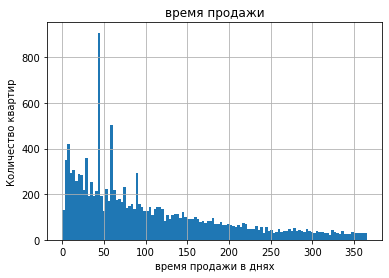

In [71]:
data['days_exposition'].hist( bins=120, range=(0,365))
plt.title('время продажи')
plt.xlabel('время продажи в днях')
plt.ylabel('Количество квартир')
plt.show()

Судя по графику, чаще всего квартиры продают за 45 и 60 дней. 


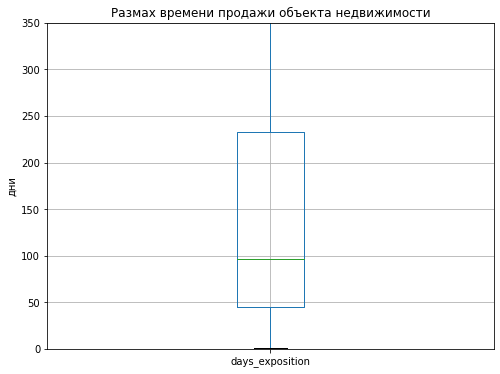

In [72]:
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(0, 350)
plt.ylabel('дни')
plt.show()

Для наглядности построим ящик с усами и увидим, что предыдущие выводы были корректны.
К основным выводам можем отнести:
- Среднее время продажи квартир 3 месяца
- Медианное значение составляет 180 дней
- Есть уникальные кейсы продаж за 1 день и супер долгие продажи в виде 1580 дней
- К быстрым продажам можно отнести продажи до 45 дней
- К долгим- свыше 231 дня

Определим Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Проведем анализ зависимости стоимости квартиры от общей площади

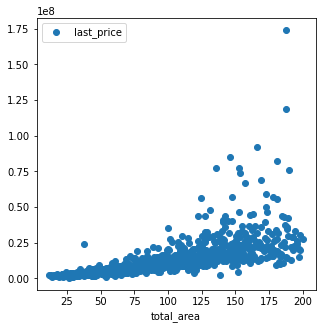

Корреляция цены и общей площади: 

            last_price  total_area
last_price     1.00000     0.65183
total_area     0.65183     1.00000 



In [73]:
data.pivot_table(index='total_area', values='last_price').plot(style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Кто бы сомневался

Проведем анализ зависимости стоимости квартиры от жилой площади

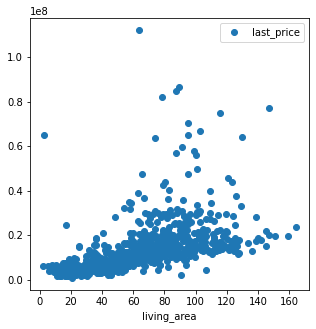

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000    -0.147096
living_area   -0.147096     1.000000 



In [74]:
data.pivot_table(index='living_area', values='last_price').plot(style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Стоимость так же сильно зависит от жилой площади

Проведем анализ зависимости стоимости квартиры от площади кухни

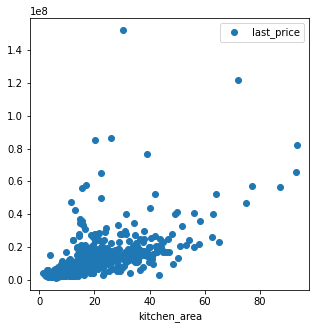

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.749667
last_price        0.749667    1.000000 



In [75]:
data.pivot_table(index='kitchen_area', values='last_price').plot(style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

Площадь кухни так же влияет на цену. После удаления выбросов по площади, мы видим что корреляция данного пункта выросла за счёт того, что уменьшилась общая total_area

Проведем анализ зависимости стоимости квартиры от колличества комнат

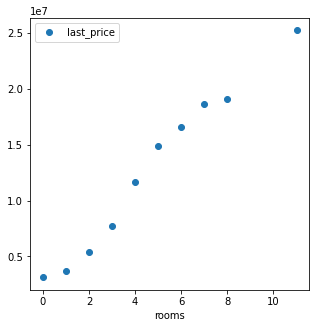

Корреляция цены и колличества комнат: 

            last_price     rooms
last_price    1.000000 -0.446114
rooms        -0.446114  1.000000 



In [76]:
data.pivot_table(index='rooms', values='last_price').plot(style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и колличества комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

А вот это интересно, корреляция есть, но не такая сильная как ранее.
Могу предположить, что основной критерий всё также площадь, так как по планировке условные 
25квм это может быть и студия и однокомнатная квартира

Проведем анализ зависимости стоимости квартиры от типа этажа

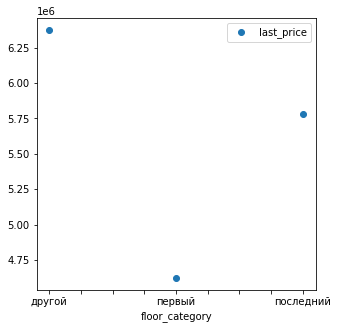

In [77]:
data.pivot_table(index='floor_category', values='last_price').plot(style='o', figsize=(5, 5))
plt.show()

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Проведем анализ зависимости стоимости квартиры от даты размещения (день недели, месяц, год)

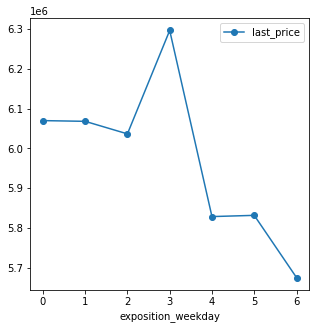

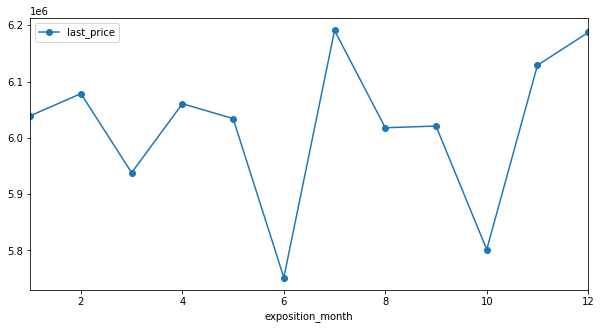

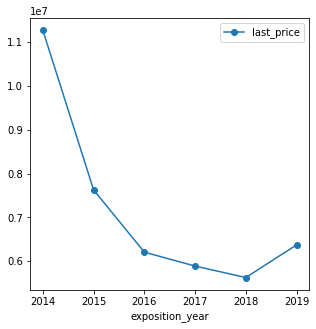

In [78]:
data.pivot_table(index='exposition_weekday', values='last_price').plot(style='o-', figsize=(5, 5))
plt.show()
data.pivot_table(index='exposition_month', values='last_price').plot(style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()
data.pivot_table(index='exposition_year', values='last_price').plot(style='o-', figsize=(5, 5))
plt.show()


День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье.
Месяц: дороже всего квартиры, продающиеся в месяце с индексом 9(сентябрь), дешевле всего - в месяце с индексом 10(ноябрь).
Год: квартиры очень сильно подешевели в 2016-2018 годах. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [79]:
top_10_localities = data['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург    12203
Всеволожск           376
Пушкин               364
Колпино              322
Гатчина              306
поселок Шушары       299
Выборг               235
Петергоф             201
Красное Село         173
Сестрорецк           165
Name: locality_name, dtype: int64

Добавим столбец price_one_square_meter (так как не сделали это раньше)))

In [80]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']
data['price_one_square_meter'] = data['price_one_square_meter'].round(2)

определили 10 населенных пунктов с наибольшим числом объявлений

In [81]:
top_10_localities_pivot = data.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,112779.788849
Пушкин,103122.538929
Сестрорецк,99560.077636
Петергоф,84757.559602
поселок Шушары,76668.627124
Колпино,75505.235776
Красное Село,72141.925029
Гатчина,68699.634837
Всеволожск,68135.144734


Наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111722 руб.), что логично. Следом по стоимости идет Пушкин(101894 руб.). Наименьшая цена за квадратный метр в Выборге(57011 руб.)

Выделим квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра

In [82]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,0,0,0,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,0,0,0,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.0,9,0,0,0,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,0,0,0,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.6,7,0,0,0,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39.00,2017-12-16,1,2.65,9,20.0,6,0,0,0,11.00,2,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0,82051.28,5,12,2017,другой,17.0
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.0,12,0,0,0,15.00,0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,91089.11,0,4,2019,другой,14.0
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,0,0,0,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,0,0,0,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.23,3,7,2018,другой,6.0


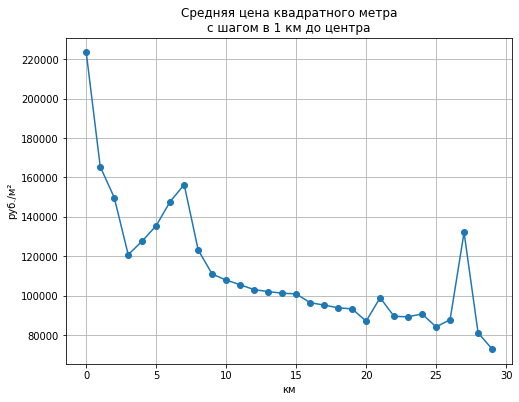

In [83]:
data_spb.pivot_table(index='city_centers_nearest_km', values='price_one_square_meter').plot(marker='o', grid=True, figsize=(8, 6), legend=False)
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

После 7-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен скачек из-за изменения типа жилья(элитные дома за городом)
Отчасти удивителен резкое падение в районе 2.5 км(видимо связанно с качеством домов в старом фонде)

### Общий вывод

Общий вывод
В данном исследовании основной целью было выявить особенности и закономерности рынка недвижимости в Санкт-Петербурге и соседних населенных пунктах.

В ходе предобработки данных мы исправили неявные дубликаты в названиях некоторых населенных пунктов, а также избавились от объявлений с аномальными и выбивающимися значениями ради повышения качества анализа и нахождения именно характерных особенностей, на которые могли серьезно повлиять немногочисленные, но сильно выбивающиеся значения.

В основной части исследования мы изучили все основные параметры объявлений и сделали несколько заслуживающих внимания наблюдений:

1) Средняя площадь продаваемых квартир составляет 35 м.кв.: чем больше площадь квартиры, тем меньше соответствующих объявлений
2) Основная масса объявлений приходится на квартиры с 1-2 комнатами
3) Значительную часть составляют объявления в пятиэтажных и девятиэтажных домах
4) Среднее удаление от центра города составляет 8 км. Объявления с удаленностью более 20 км редки и принадлежат квартирам из малых населенных пунктов
5) В будние дни объявления публикаю чаще, чем в выходные
6) Почти все закрытые объявления были закрыты в течение года,среднее значение продажи составляет 90 дней

Анализируя различные факторы, влияющие на конечную стоимость квартиры, мы смогли прийти к некоторым ключевым выводам:

1) Основной фактор, влияющий на стоимость квартиры - общая площадь. Жилая и кухонная площадь, а так же количество комнат, хоть и являются составляющими фактора общей площади, но по отдельности оказывают на конечную стоимость гораздо меньшее влияние.
2) С увеличением расстояния до центра уменьшается средняя стоимость каждого квадратного метра квартиры
3) Квартиры на первом и последнем этажах в среднем дешевле, чем на промежуточных
4) Стоимость квартиры незначительно зависит от дня недели публикации. 
5) Видим зависимость стоимость квартиры от года размещения обьявления, с 2014 по 2018 видим спад стоимости, а после 2019 повышение цены
7) В Санкт-Петербурге - самый высокий показатель стоимости каждого квадратного метра площади (в среднем 114 843 тысяч / м.кв)

Если я правильно понял задание, то в гистограммах по высоте потолка я отбросил аномальные значения. Если это требуется ещё в каких-то колонках подскажите где это нужно

Отбросил аномальные значения, удалил данные где общая площадь квартиры больше 200 кв.м и высота дома выше 17ти этажей
Скорректирова выводы на основании новых данных


Если расчёты не корректны, прошу уточнить:
- столбы со всеми аномальными значениями
- делать корректировку в новом датафрейме и сравнивать старые и новые значения или работать в одном.